<a href="https://colab.research.google.com/github/aadi-mishra/Deep-Learning-Projects-Keras/blob/main/BinaryClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The IMDB dataset
We are working with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [41]:
# Load Dataset 
from keras.datasets import imdb
from keras import models
from keras import layers
import pandas as pd
import numpy as np

The argument num_words=10000 means we are only keeping the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows
us to work with vector data of manageable size.

In [42]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [43]:
#train_data.shape
#train_labels[0]

Because we are restricting ourselves to the top 10,000 most frequent words, no word
index will exceed 10,000, as we can see:

In [44]:
#max([max(sequence) for sequence in train_data])

Decoding our data to human readable form

In [45]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#print(decoded_review)
#print(reverse_word_index)


Data preprocesssing , Vectorizing our data through padding and one-hot encoding

In [46]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building our Network

In [55]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Validating

In [57]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [58]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=4,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 32ms/step - loss: 0.5978 - accuracy: 0.7000 - val_loss: 0.3838 - val_accuracy: 0.8733
Epoch 2/4
30/30 [==============================] - 1s 23ms/step - loss: 0.3238 - accuracy: 0.8992 - val_loss: 0.3079 - val_accuracy: 0.8858
Epoch 3/4
30/30 [==============================] - 1s 24ms/step - loss: 0.2290 - accuracy: 0.9313 - val_loss: 0.2901 - val_accuracy: 0.8853
Epoch 4/4
30/30 [==============================] - 1s 23ms/step - loss: 0.1799 - accuracy: 0.9422 - val_loss: 0.2760 - val_accuracy: 0.8894


Plotting the training and validation loss

In [51]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

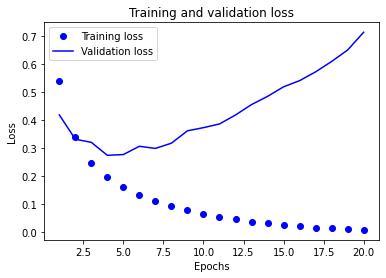

In [52]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

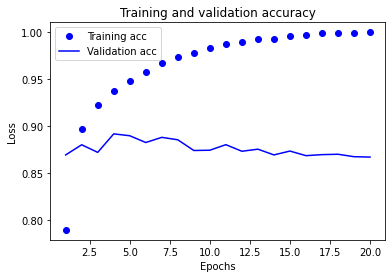

In [53]:
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradient-
descent optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of what we warned against earlier: a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you’re seeing is overfit-
ting : after the second epoch, you’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

In this case, to prevent overfitting, you could stop training after three epochs.

In [60]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 1s 2ms/step - loss: 0.2952 - accuracy: 0.8808
[0.2951961159706116, 0.8808000087738037]


This fairly naive approach achieves an accuracy of 88%